In [117]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from statistics import mean
import numpy as np
import scipy.interpolate
from matplotlib.patches import Path, PathPatch

In [118]:
conn = sqlite3.connect('GeoPVWattData - Copy.db')
c = conn.cursor()

In [119]:
# sql = """CREATE TABLE LatLonData(
#         lat real,
#         lon real,
#         city text,
#         state text,
#         tilt real,
#         azimuth real,
#         azimuthname text,
#         solrad_jan real,
#         solrad_feb real,
#         solrad_mar real,
#         solrad_apr real,
#         solrad_may real,
#         solrad_jun real,
#         solrad_jul real,
#         solrad_aug real,
#         solrad_sep real,
#         solrad_oct real,
#         solrad_nov real,
#         solrad_dec real,
#         solrad_average real,
#         solrad_minus real,
#         solrad_plus real,
#         solrad_annual real,
#         PRIMARY KEY (lat, lon, tilt, azimuth)
#         )"""

In [129]:
# sql = """SELECT lat, lon, solrad_annual FROM LatLonData WHERE tilt = 0"""
sql = """SELECT lat, lon, solrad_annual FROM LatLonData WHERE tilt = 90 AND azimuth = 180"""
c.execute(sql)
# df=DataFrame(c.fetchall())
df = pd.read_sql(sql,conn)
print(df)

        lat      lon  solrad_annual
0    37.617 -122.400          3.344
1    40.783  -73.883          3.025
2    34.200 -118.350          3.518
3    41.783  -87.750          2.934
4    25.817  -80.300          2.870
..      ...      ...            ...
616  41.117 -100.667          3.647
617  30.967  -83.200          2.994
618  42.550  -94.183          3.079
619  41.100  -92.450          2.710
620  44.333  -93.317          2.871

[621 rows x 3 columns]


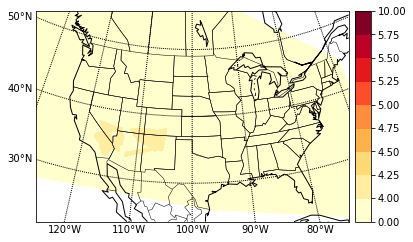

In [130]:
lons = df['lon'].tolist()
lats = df['lat'].tolist()
sol = df['solrad_annual'].tolist()
lon_0 = mean(lons)
lat_0 = mean(lats)
# m = Basemap(width=5000000,height=3500000,
#             resolution='l',projection='stere',\
#             lat_ts=40,lat_0=lat_0,lon_0=lon_0)


# m = Basemap(width=5000000,height=3500000, \
#             resolution='l',projection='stere', \
#             llcrnrlon=-120.,llcrnrlat=20.,urcrnrlon=-60.,urcrnrlat=50.)

fig, ax = plt.subplots()
m = Basemap(width=5200000,height=3500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)


x = lons
y = lats

# Set up a regular grid of interpolation points
xi, yi = np.linspace(min(x), max(x), 300), np.linspace(min(y), max(y), 300)
xi, yi = np.meshgrid(xi, yi)
x,y = m(x,y)
xi, yi = m(xi, yi)

# Interpolate; there's also method='cubic' for 2-D data such as here
zi = scipy.interpolate.griddata((x, y), sol, (xi, yi), method='linear')

# plt.imshow(zi, vmin=min(sol), vmax=max(sol), origin='lower',
#            extent=[min(x), max(x), min(y), max(y)])
# plt.colorbar()
# plt.show()


# cs = m.pcolor(xi,yi,zi)
# m.imshow(zi, vmin=min(sol), vmax=max(sol), origin='lower')
# ,
#             extent=[min(xi), max(xi), min(yi), max(yi)])

# m.pcolormesh(xi,yi,zi,shading='flat',cmap=plt.cm.jet)
#m.pcolor(xi,yi,zi)
levels = [0, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 10]
clrs = ([1,1,0.8078],[1,0.9294,0.6314],[0.9922,0.8549,0.4627],[0.9922,0.6980,0.2980],
        [0.9961,0.5529,0.2392],[0.9882,0.3059,0.1686],[0.8941,0.0980,0.1098],
        [0.7412,0,0.1490],[0.5059,0,0.1490])
cplot = m.contourf(xi,yi,zi, levels,colors=clrs)
cplot.cmap.set_under([1,1,0.8078])
cplot.cmap.set_over([0.5059,0,0.1490])


m.colorbar(location='right')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# m.fillcontinents(color=None, lake_color='lightblue')
# m.drawmapboundary(fill_color='lightblue')



# #################white clip out ocean
# ##getting the limits of the map:
# x0,x1 = ax.get_xlim()
# y0,y1 = ax.get_ylim()
# map_edges = np.array([[x0,y0],[x1,y0],[x1,y1],[x0,y1]])

# ##getting all polygons used to draw the coastlines of the map
# polys = [p.boundary for p in m.landpolygons]

# ##combining with map edges
# polys = [map_edges]+polys[:]

# ##creating a PathPatch
# codes = [
#     [Path.MOVETO] + [Path.LINETO for p in p[1:]]
#     for p in polys
# ]
# polys_lin = [v for p in polys for v in p]
# codes_lin = [c for cs in codes for c in cs]
# path = Path(polys_lin, codes_lin)
# patch = PathPatch(path,facecolor='white', lw=0)

# ##masking the data:
# ax.add_patch(patch)

In [ ]:
print((zi))


In [1]:
conn.commit()
conn.close()

NameError: name 'conn' is not defined